In [1]:
install.packages("rolypoly")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [78]:
library(rolypoly)

Welcome to rolypoly! Say hi @diegoisworking.


In [ ]:
#### for this we would want GWAS-like summary stats
# rows are SNPs,
# columns: chrom  pos   rsid    beta    se      maf

In [ ]:
#### secondly, we want to look at gene expression
# rows are genes,
# columns: celltype1 celltype2 celltype3 (for instance)

In [ ]:
#### third, we need gene annotations to map genes to genetic variants
# rows are genes (no rownames)
# columns: chrom  start end label (gene names as in rownames of expression)

In [ ]:
##############################################
################# GWAS #######################
##############################################

In [ ]:
# meta-analysis PD GWAS
# PDWBS = web-based study of Parkinson's disease
# PDGene
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5812477/

In [79]:
PD_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/gwas/PD_meta_analysis_PDGENE_PDWBS.txt"
PD = read.table(PD_filename, header = T)
head(PD)

SNP,CHR,BP,A1,A2,P.PDGENE,OR.PDGENE,SE.PDGENE,P.PDWBS,OR.PDWBS,SE.PDWBS,P.META,OR.META,SE.META
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs10000290,4,15753299,G,A,6.61e-07,0.89,0.023,4.95e-03,0.928,0.027,2.27e-08,0.906,0.018
rs10000339,4,80878580,C,T,5.38e-05,0.93,0.018,3.38e-01,1.021,0.021,1.37e-02,0.967,0.014
rs10002448,4,77269262,G,A,6.66e-07,0.92,0.017,2.32e-03,0.943,0.019,8.81e-09,0.930,0.013
rs10003708,4,90643051,A,C,1.61e-25,1.35,0.029,1.02e-18,1.335,0.033,1.46e-42,1.344,0.022
rs10004443,4,77147513,A,G,3.04e-06,1.12,0.024,5.52e-04,1.097,0.027,7.52e-09,1.110,0.018
rs10005305,4,15694890,G,A,4.86e-05,0.94,0.015,5.55e-02,0.964,0.019,1.26e-05,0.949,0.012


In [392]:
PD = PD[PD$CHR %in% c(1:22),]
unique(PD$CHR)

[1]  4  1 17  6  3  5  7  8  2  9 16 10 14 12 18 11 15 19 22 13 21 20

In [393]:
# rows are SNPs,
# columns: chrom  pos   rsid    beta    se      maf

In [394]:
# META
gwas_meta = data.frame(chrom = PD$CHR, pos = PD$BP, rsid = PD$SNP, beta = PD$OR.META,
                 se = PD$SE.META, maf = 0.45)

In [395]:
# PDGENE
gwas_pdgene = data.frame(chrom = PD$CHR, pos = PD$BP, rsid = PD$SNP, beta = PD$OR.PDGENE,
                 se = PD$SE.PDGENE, maf = 0.45)

In [396]:
## PDWBS
gwas_pdwbs = data.frame(chrom = PD$CHR, pos = PD$BP, rsid = PD$SNP, beta = PD$OR.PDGENE,
                 se = PD$SE.PDGENE, maf = 0.45)

In [261]:
###################################################
################# Gene Annotations ################
###################################################

In [229]:
anno_filename = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/ensembl_gene_id_annos.tsv"
anno1 = read.table(anno_filename, header = T)
head(anno1,2)

feature_id,chromosome,start,end
<chr>,<chr>,<int>,<int>
ENSG00000000003,X,99883667,99894988
ENSG00000000419,20,49551404,49575092


In [230]:
# rows are genes (no rownames)
# columns: chrom  start end label (gene names as in rownames of expression)

In [231]:
anno = data.frame(chrom = anno1$chromosome, start = anno1$start,
                 end = anno1$end, label = anno1$feature_id)
head(anno,2)

chrom,start,end,label
<chr>,<int>,<int>,<chr>
X,99883667,99894988,ENSG00000000003
20,49551404,49575092,ENSG00000000419


In [232]:
anno = anno[anno$chrom %in% c(1:22),]

In [233]:
####################################################
################# Expression #######################
####################################################

In [234]:
### D11 expression (averaged per donor)

In [278]:
# mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/qtl_analysis/eqtl_discovery/"
# celltype = "celltype_FPP/"
# celltype = "celltype_P_FPP/"
# celltype = "celltype_NB/"
mysuffix = "phenotypes.tsv"

In [279]:
### D30 expression (averaged per donor)

In [311]:
# mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/"
# celltype = "celltype_DA/"
# celltype = "celltype_Sert/"
# celltype = "celltype_Epen1/"
# celltype = "celltype_Astro/"
mysuffix = "phenotypes.tsv"

In [312]:
### D52 expression (averaged per donor)

In [355]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery/"
celltype = "celltype_DA/"
# celltype = "celltype_Sert/"
# celltype = "celltype_Epen1/"
# celltype = "celltype_Astro/"
mysuffix = "phenotypes.tsv"

In [356]:
myfilename = paste0(mydir,celltype,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

ensembl_gene_id,HPSI0114i.bezi_3,HPSI0114i.eipl_1,HPSI0114i.fikt_3,HPSI0114i.kolf_2,HPSI0114i.lexy_2,HPSI0114i.posc_1,HPSI0114i.rozh_4,HPSI0114i.vass_1,HPSI0114i.wegi_1,⋯,HPSI1113i.hayt_3,HPSI1113i.ieki_3,HPSI1113i.podx_1,HPSI1113i.qolg_1,HPSI1113i.qorq_1,HPSI1113i.vuud_2,HPSI1114i.kuul_1,HPSI1114i.ualf_6,HPSI1114i.zuuy_4,HPSI1213i.hehd_1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.2129366,0.17412873,0.16483773,0.241951913,0.19628760,0.1350252,0.28562975,0.15251644,0.17694168,⋯,0.16641314,0.2596782,0.13344060,0.19834630,0.21171346,0.16643322,0.18686631,0.1909191,0.08671865,0.23493059
ENSG00000227640,0.0000000,0.03499793,0.01862505,0.008332732,0.03986735,0.0000000,0.05573122,0.02829643,0.01311885,⋯,0.01713639,0.0000000,0.01212331,0.02206481,0.08416077,0.01983394,0.00443778,0.0000000,0.00000000,0.03132048


In [357]:
# avgs_NB_D11 = data.frame(gene = myfile$ensembl_gene_id, NB_D11 = rowMeans(myfile[,-c(1)]))
# head(avgs_NB_D11,2)

In [358]:
# avgs_P_FPP_D11 = data.frame(gene = myfile$ensembl_gene_id, P_FPP_D11 = rowMeans(myfile[,-c(1)]))
# head(avgs_P_FPP_D11,2)

In [359]:
# avgs_FPP_D11 = data.frame(gene = myfile$ensembl_gene_id, FPP_D11 = rowMeans(myfile[,-c(1)]))
# head(avgs_FPP_D11,2)

In [360]:
# avgs_Astro_D30 = data.frame(gene = myfile$ensembl_gene_id, Astro_D30 = rowMeans(myfile[,-c(1)]))
# head(avgs_Astro_D30,2)

In [361]:
# avgs_Epen1_D30 = data.frame(gene = myfile$ensembl_gene_id, Epen1_D30 = rowMeans(myfile[,-c(1)]))
# head(avgs_Epen1_D30,2)

In [362]:
# avgs_Sert_D30 = data.frame(gene = myfile$ensembl_gene_id, Sert_D30 = rowMeans(myfile[,-c(1)]))
# head(avgs_Sert_D30,2)

In [363]:
# avgs_DA_D30 = data.frame(gene = myfile$ensembl_gene_id, DA_D30 = rowMeans(myfile[,-c(1)]))
# head(avgs_DA_D30,2)

In [364]:
# avgs_Astro_D52 = data.frame(gene = myfile$ensembl_gene_id, Astro_D52 = rowMeans(myfile[,-c(1)]))
# head(avgs_Astro_D52,2)

In [365]:
# avgs_Epen1_D52 = data.frame(gene = myfile$ensembl_gene_id, Epen1_D52 = rowMeans(myfile[,-c(1)]))
# head(avgs_Epen1_D52,2)

In [366]:
# avgs_Sert_D52 = data.frame(gene = myfile$ensembl_gene_id, Sert_D52 = rowMeans(myfile[,-c(1)]))
# head(avgs_Sert_D52,2)

In [367]:
avgs_DA_D52 = data.frame(gene = myfile$ensembl_gene_id, DA_D52 = rowMeans(myfile[,-c(1)]))
head(avgs_DA_D52,2)

gene,DA_D52
<chr>,<dbl>
ENSG00000261657,0.18587442
ENSG00000227640,0.01737788


In [368]:
library(dplyr)

In [369]:
df0 = inner_join(avgs_FPP_D11, avgs_P_FPP_D11, by = "gene")
df_D11 = inner_join(df0, avgs_NB_D11, by = "gene")
head(df_D11)

gene,FPP_D11,P_FPP_D11,NB_D11
<chr>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.30340969,0.301253214,0.31592120
ENSG00000227640,0.05590316,0.037318994,0.01603119
ENSG00000247400,0.14828730,0.110834216,0.13733673
ENSG00000228889,0.03919345,0.028835293,0.03136523
ENSG00000261485,0.01461320,0.009612585,0.00866005
ENSG00000272143,0.13674774,0.114029398,0.13953726


In [370]:
df0 = inner_join(avgs_DA_D30, avgs_Sert_D30, by = "gene")
df1 = inner_join(df0, avgs_Epen1_D30, by = "gene")
df_D30 = inner_join(df1, avgs_Astro_D30, by = "gene")
head(df_D30)

gene,DA_D30,Sert_D30,Epen1_D30,Astro_D30
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.11035984,0.20056294,0.17347501,0.18673083
ENSG00000227640,0.05134083,0.12299665,0.14630144,0.10014379
ENSG00000247400,0.03112433,0.04530167,0.05549724,0.04645816
ENSG00000228889,0.01064196,0.01519511,0.08209101,0.02866178
ENSG00000272143,0.02931921,0.06409544,0.17139874,0.13978708
ENSG00000261577,0.13129016,0.25583107,0.06751840,0.10296909


In [371]:
df0 = inner_join(avgs_DA_D52, avgs_Sert_D52, by = "gene")
df1 = inner_join(df0, avgs_Epen1_D52, by = "gene")
df_D52 = inner_join(df1, avgs_Astro_D52, by = "gene")
head(df_D52)

gene,DA_D52,Sert_D52,Epen1_D52,Astro_D52
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.18587442,0.24154222,0.18700089,0.18817982
ENSG00000227640,0.01737788,0.03693412,0.02885561,0.04654087
ENSG00000247400,0.13253690,0.09664035,0.07322539,0.08607722
ENSG00000228889,0.03068636,0.03664857,0.06873795,0.04349935
ENSG00000272143,0.04441751,0.08413301,0.13695278,0.11135813
ENSG00000261577,0.11733386,0.20931280,0.05144622,0.10211150


In [372]:
df = inner_join(inner_join(df_D11, df_D30, by = "gene"), df_D52, by = "gene")
head(df,2)
rownames(df) = df$gene
df = df[,-c(1)]
head(df,2)

gene,FPP_D11,P_FPP_D11,NB_D11,DA_D30,Sert_D30,Epen1_D30,Astro_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.30340969,0.30125321,0.31592120,0.11035984,0.2005629,0.1734750,0.1867308,0.18587442,0.24154222,0.18700089,0.18817982
ENSG00000227640,0.05590316,0.03731899,0.01603119,0.05134083,0.1229967,0.1463014,0.1001438,0.01737788,0.03693412,0.02885561,0.04654087


,FPP_D11,P_FPP_D11,NB_D11,DA_D30,Sert_D30,Epen1_D30,Astro_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.30340969,0.30125321,0.31592120,0.11035984,0.2005629,0.1734750,0.1867308,0.18587442,0.24154222,0.18700089,0.18817982
ENSG00000227640,0.05590316,0.03731899,0.01603119,0.05134083,0.1229967,0.1463014,0.1001438,0.01737788,0.03693412,0.02885561,0.04654087


In [373]:
sum(is.na(df))

[1] 0

In [374]:
########### LD annotations downloaded from rolypoly
## as described here: https://cran.r-project.org/web/packages/rolypoly/vignettes/intro.html

In [375]:
ld_path = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/rolypoly/LD/"

In [386]:
#### 
rp_pdgene <- rolypoly_roll(
  gwas_data = gwas_pdgene,
  block_annotation = anno,
  block_data = df,
  ld_folder = ld_path
)

adding gwas
filtering out SNPs with MAF < 1%
adding block annotations
beginning processs of linking gwas and block annotations
##------ Mon Jan 13 11:35:45 2020 ------## - starting blocks on chrom: 1
##------ Mon Jan 13 11:35:50 2020 ------## - starting blocks on chrom: 10
##------ Mon Jan 13 11:35:54 2020 ------## - starting blocks on chrom: 11
##------ Mon Jan 13 11:36:00 2020 ------## - starting blocks on chrom: 12
##------ Mon Jan 13 11:36:04 2020 ------## - starting blocks on chrom: 13
##------ Mon Jan 13 11:36:07 2020 ------## - starting blocks on chrom: 14
##------ Mon Jan 13 11:36:11 2020 ------## - starting blocks on chrom: 15
##------ Mon Jan 13 11:36:12 2020 ------## - starting blocks on chrom: 16
##------ Mon Jan 13 11:36:15 2020 ------## - starting blocks on chrom: 17
##------ Mon Jan 13 11:36:18 2020 ------## - starting blocks on chrom: 18
##------ Mon Jan 13 11:36:19 2020 ------## - starting blocks on chrom: 19
##------ Mon Jan 13 11:36:24 2020 ------## - starting blocks

In [380]:
#### PDGENE 

In [381]:
rp_pdgene$full_results$parameters %>% sort

Astro_D30    Sert_D52      DA_D30   P_FPP_D11      NB_D11   Epen1_D52 
-0.43892821 -0.39432810 -0.33883676 -0.30711968 -0.07118974 -0.01082357 
  Epen1_D30     FPP_D11   Astro_D52      DA_D52    Sert_D30   intercept 
 0.04064363  0.23628361  0.29669395  0.36580514  0.61132650  1.00954342

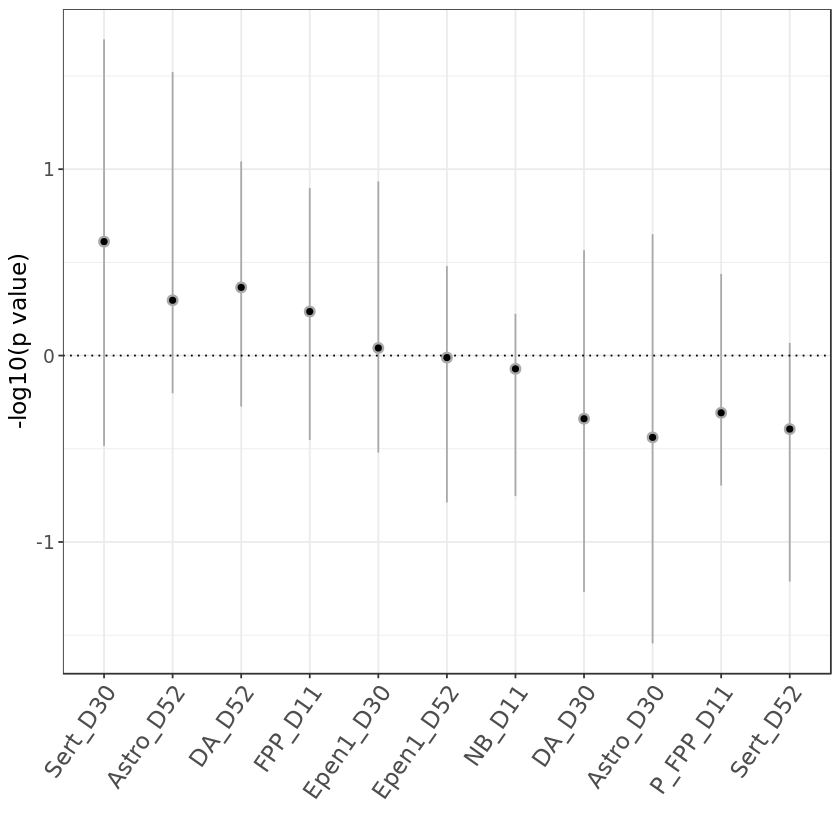

In [382]:
plot_rolypoly_annotation_estimates(rp_pdgene)

In [390]:
#### PDWBS

In [397]:
#### 
rp_pdwbs <- rolypoly_roll(
  gwas_data = gwas_pdwbs,
  block_annotation = anno,
  block_data = df,
  ld_folder = ld_path
)

adding gwas
filtering out SNPs with MAF < 1%
adding block annotations
beginning processs of linking gwas and block annotations
##------ Mon Jan 13 11:39:17 2020 ------## - starting blocks on chrom: 1
##------ Mon Jan 13 11:39:27 2020 ------## - starting blocks on chrom: 10
##------ Mon Jan 13 11:39:30 2020 ------## - starting blocks on chrom: 11
##------ Mon Jan 13 11:39:38 2020 ------## - starting blocks on chrom: 12
##------ Mon Jan 13 11:39:42 2020 ------## - starting blocks on chrom: 13
##------ Mon Jan 13 11:39:46 2020 ------## - starting blocks on chrom: 14
##------ Mon Jan 13 11:39:50 2020 ------## - starting blocks on chrom: 15
##------ Mon Jan 13 11:39:52 2020 ------## - starting blocks on chrom: 16
##------ Mon Jan 13 11:39:54 2020 ------## - starting blocks on chrom: 17
##------ Mon Jan 13 11:39:59 2020 ------## - starting blocks on chrom: 18
##------ Mon Jan 13 11:40:00 2020 ------## - starting blocks on chrom: 19
##------ Mon Jan 13 11:40:05 2020 ------## - starting blocks

In [398]:
rp_pdwbs$full_results$parameters %>% sort

Astro_D30    Sert_D52      DA_D30   P_FPP_D11      NB_D11   Epen1_D52 
-0.43892821 -0.39432810 -0.33883676 -0.30711968 -0.07118974 -0.01082357 
  Epen1_D30     FPP_D11   Astro_D52      DA_D52    Sert_D30   intercept 
 0.04064363  0.23628361  0.29669395  0.36580514  0.61132650  1.00954342

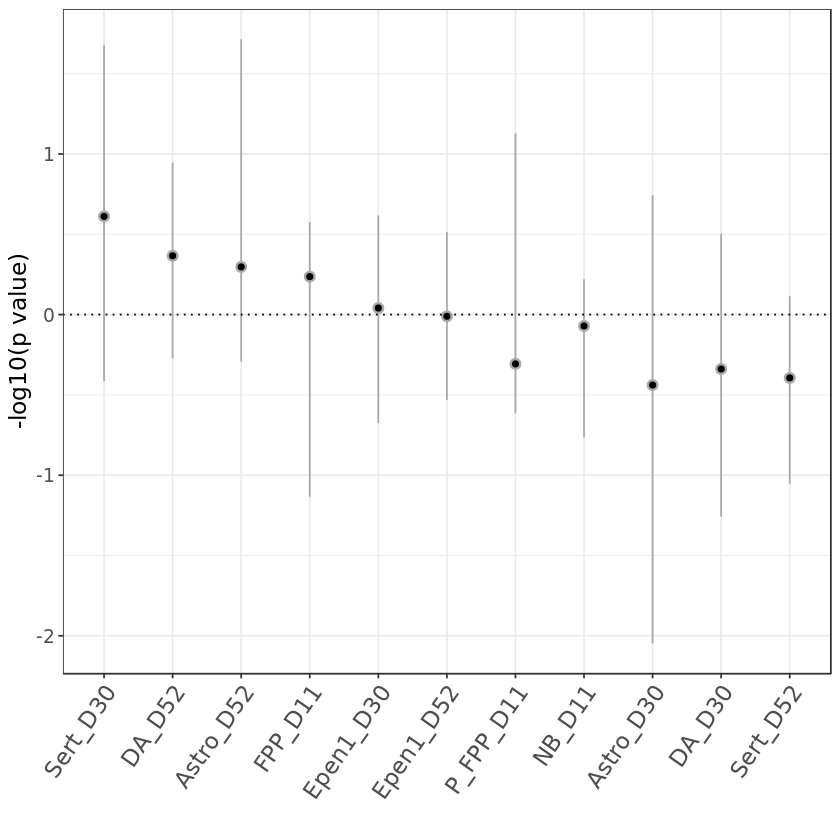

In [399]:
plot_rolypoly_annotation_estimates(rp_pdwbs)

In [387]:
#### FULL METADATA PD (META)

In [ ]:
#### 
rp_meta <- rolypoly_roll(
  gwas_data = gwas_meta,
  block_annotation = anno,
  block_data = df,
  ld_folder = ld_path
)

In [388]:
rp_meta$full_results$parameters %>% sort

DA_D30    P_FPP_D11     Sert_D52    Astro_D52    Astro_D30    Epen1_D30 
-0.397186703 -0.319605360 -0.199649821 -0.045983209 -0.032983080  0.003503396 
      NB_D11    Epen1_D52     Sert_D30      FPP_D11       DA_D52    intercept 
 0.004731411  0.085048296  0.237010906  0.270075804  0.356071707  0.997563224

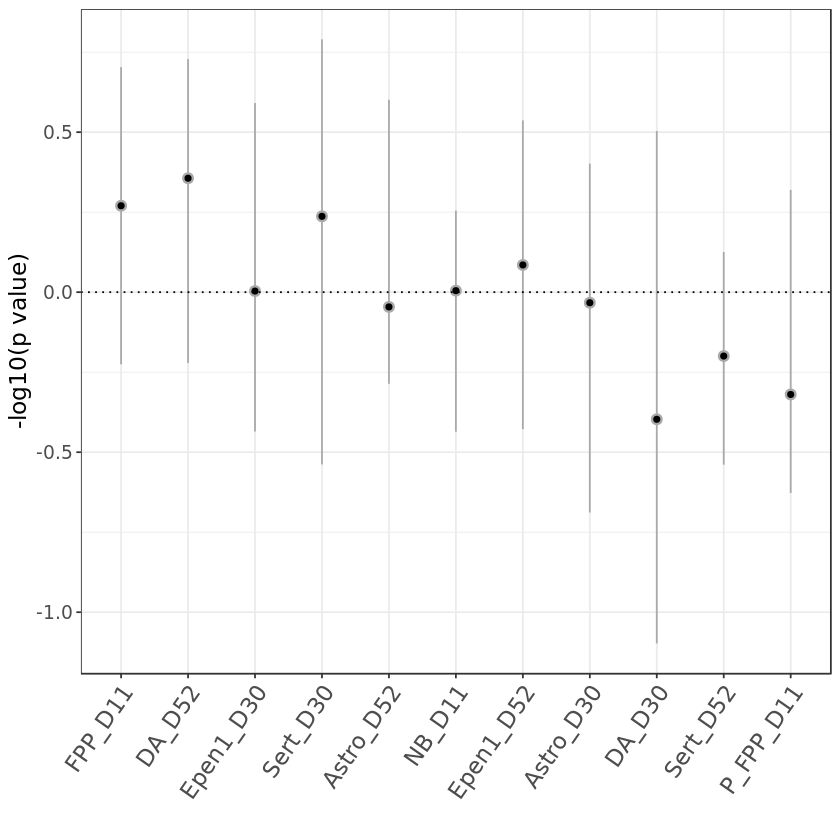

In [402]:
plot_rolypoly_annotation_estimates(rp_meta)

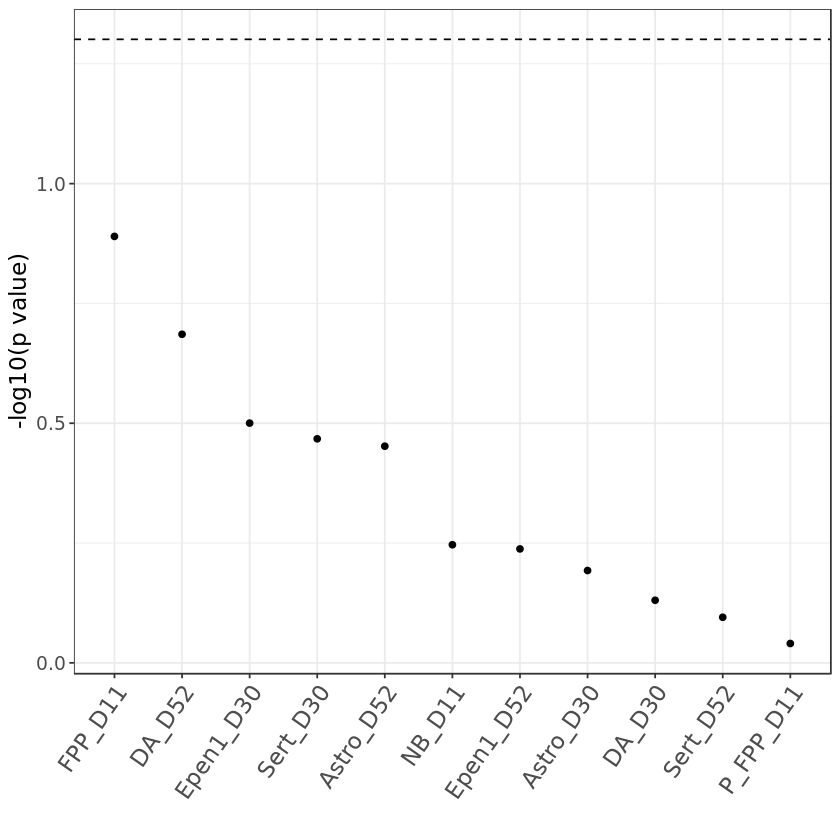

In [400]:
plot_rolypoly_annotation_ranking(rp_meta)